In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
L = 1
T = 0.6
c = 1
a = 1e3
x0 = 0.2
N = 1000
dx = L/N

x = np.linspace(0,L,N+1)
u0 = np.exp(-a*(x-x0)**2)

In [3]:
# Explicit solution
start = time.time()

CFL = 0.1
dt = CFL*dx/c
uexp = u0.copy()
f = 0*u0

for t in range(int(T/dt)):
    for i in range(N):
        f[i] = (uexp[i+1]-uexp[i-1])
        uexp[i] -= (0.5*CFL)*f[i]
    uexp[-1] = uexp[0]
stop = time.time()
print("Runtime for explicit solution: {} s".format(stop-start))

Runtime for explicit solution: 4.302061080932617 s


In [4]:
def solveThomas(a,b,c,d):
    c1 = np.zeros(len(d))
    d1 = np.zeros(len(d))
    x = np.zeros(len(d))
    
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1,len(d)-1):
        c1[i] = c[i]/(b[i] - (a[i]*c1[i-1]))
        d1[i] = (d[i] - (a[i]*d1[i-1]))/(b[i] - (a[i]*c1[i-1]))
    d1[-1] = (d[-1] - (a[-1]*d1[-2]))/(b[-1] - (a[-1]*c1[-2]))
    x[-1] = d1[-1]
    for i in range(len(d)-2,-1,-1):
        x[i] = d1[i] - c1[i]*x[i+1]
    return x

In [5]:
# Imlicit solution
start = time.time()

CFL = 0.1
dt = CFL*dx/c
uimp = u0.copy()

a1 = -0.5*CFL*np.ones(N)
a2 = np.ones(N)
a3 = 0.5*CFL*np.ones(N)
a1[-1] = -1
a3[0] = -1

for t in range(int(T/dt)):
    d1 = uimp
    d1[0] = 0
    d1[-1] = 0
    uimp = solveThomas(a1,a2,a3,d1)

stop = time.time()
print("Runtime for implicit solution: {} s".format(stop-start))

Runtime for implicit solution: 9.079611778259277 s


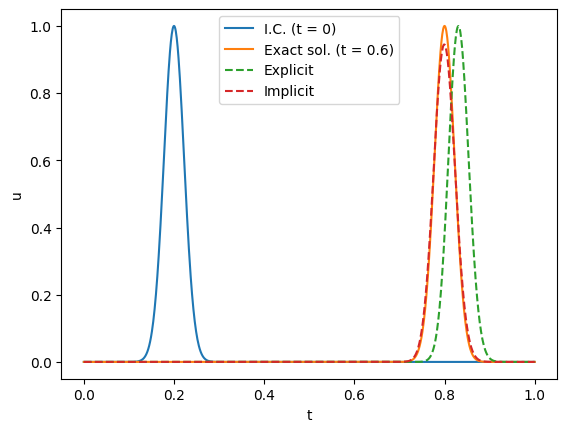

In [6]:
plt.plot(x,np.exp(-a*(x-x0)**2),label='I.C. (t = 0)')
plt.plot(x,np.exp(-a*(x-x0-T)**2),label='Exact sol. (t = {})'.format(T))
plt.plot(x,uexp,label='Explicit',linestyle='dashed')
plt.plot(x,uimp,label='Implicit',linestyle='dashed')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()